# 数据分析与可视化实战案例（1）：学习时间与成绩的关系

## 练习：表score_sim.csv中是某MOOC记录的学生的学习时间与成绩。其中，有部分同学并没有参加最后的考试，其成绩没有记录。试从中训练线性回归模型，并进行成绩的预测。

### 提示1：可以使用 sklearn中的linear_model来进行建模


In [319]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

### 提示2：采用K-fold cross validation划分数据集为训练集和测试集

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/5, random_state = 0) 

In [72]:
row = int(np.random.rand() * 7)+1
col = int(np.random.rand() * 5)+1

In [73]:
str_who = str('请第{0}排第{1}列的同学上传实战练习').format(row, col)
str_who

'请第6排第1列的同学上传实战练习'

## 第1步：导入NumPy, pandas，数据可视化库matplotlib
 `%matplotlib inline`是Ipython的魔法函数，其作用是使matplotlib绘制的图像嵌入在juptyer notebook的单元格里

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 第2步：读入数据集，并进行数据清洗

In [75]:
dataset = pd.read_csv('./score_sim.csv')
dataset

,Unnamed: 0,stu_no,time,score
0,0,20210100001,0.9,NaN
1,1,20210100002,2.6,15.0
2,2,20210100003,5.8,53.0
3,3,20210100004,2.0,14.0
4,4,20210100005,4.6,35.0
...,...,...,...,...
9995,9995,20210109996,1.2,5.0
9996,9996,20210109997,7.2,65.0
9997,9997,20210109998,7.7,78.0
9998,9998,20210109999,6.9,59.0


In [76]:
del dataset['Unnamed: 0']
del dataset['stu_no']

In [9]:
dataset

,time,score
0,0.9,NaN
1,2.6,15.0
2,5.8,53.0
3,2.0,14.0
4,4.6,35.0
...,...,...
9995,1.2,5.0
9996,7.2,65.0
9997,7.7,78.0
9998,6.9,59.0


In [77]:
dataset = dataset.dropna()
#dataset = dataset.fillna(0)
dataset

,time,score
1,2.6,15.0
2,5.8,53.0
3,2.0,14.0
4,4.6,35.0
5,9.9,82.0
...,...,...
9995,1.2,5.0
9996,7.2,65.0
9997,7.7,78.0
9998,6.9,59.0


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9192 entries, 1 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    9192 non-null   float64
 1   score   9192 non-null   float64
dtypes: float64(2)
memory usage: 215.4 KB


In [79]:
dataset.describe()

,time,score
count,9192.000000,9192.000000
mean,6.269648,53.911445
std,3.415778,32.138433
min,0.000000,0.000000
25%,3.400000,26.000000
50%,6.500000,56.000000
75%,9.200000,82.000000
max,11.900000,100.000000


Text(0, 0.5, 'score')

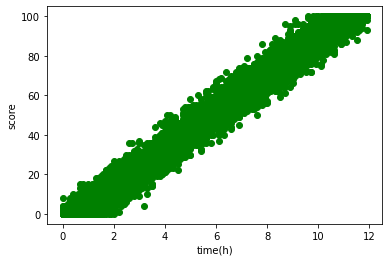

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(dataset['time'] , dataset['score'], color = 'green')
ax1.set_xlabel('time(h)')
ax1.set_ylabel('score')

## 第3步：提取特征
### 提取特征：学习时间 提取标签：学习成绩

In [80]:
feature_columns = ['time']
label_column = ['score']

In [81]:
features = dataset[feature_columns]
label = dataset[label_column]

In [82]:
features

,time
1,2.6
2,5.8
3,2.0
4,4.6
5,9.9
...,...
9995,1.2
9996,7.2
9997,7.7
9998,6.9


In [83]:
type(features)

pandas.core.frame.DataFrame

In [84]:
label

,score
1,15.0
2,53.0
3,14.0
4,35.0
5,82.0
...,...
9995,5.0
9996,65.0
9997,78.0
9998,59.0


In [85]:
X = features.values
X.size

9192

In [86]:
Y = label.values
Y.size

9192

## 第四步：建立模型
### 拆分数据，五分之四的数据作为训练集，四分之一的数据作为测试集

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/5, random_state = 0) 

In [87]:
X

array([[2.6],
       [5.8],
       [2. ],
       ...,
       [7.7],
       [6.9],
       [4.2]])

In [88]:
X_train.size

7353

In [89]:
X_train

array([[ 3.1],
       [10.9],
       [ 9.3],
       ...,
       [ 3.5],
       [ 0.5],
       [11.5]])

In [90]:
X_test.size

1839

Text(0.5, 1.0, 'testing set')

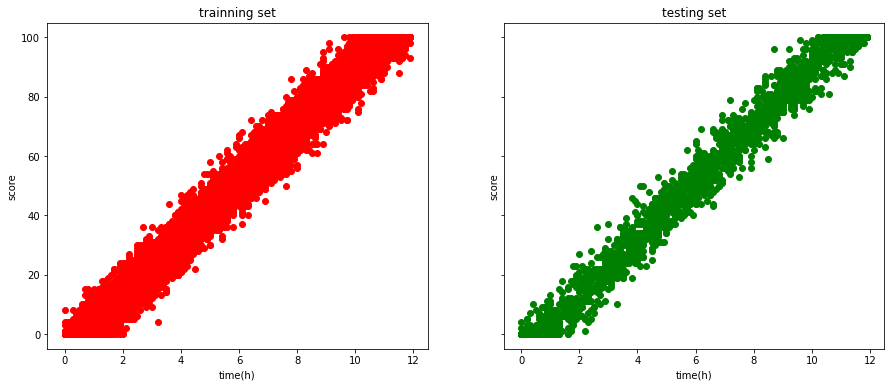

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6),sharey=True)

axes[0].scatter(X_train , Y_train, color = 'red')
axes[0].set_xlabel('time(h)')
axes[0].set_ylabel('score')
axes[0].set_title('trainning set')

axes[1].scatter(X_test , Y_test, color = 'green')
axes[1].set_xlabel('time(h)')
axes[1].set_ylabel('score')
axes[1].set_title('testing set')

### 用训练集的数据进行训练

In [91]:
%%time
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

Wall time: 2.97 ms


Text(0, 0.5, 'score')

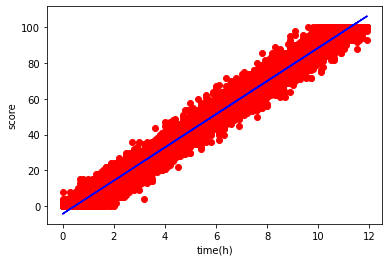

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(X_train , Y_train, color = 'red')
ax1.plot(X_train , regressor.predict(X_train), color ='blue')
ax1.set_xlabel('time(h)')
ax1.set_ylabel('score')

### 对测试集进行预测

In [92]:
X_test

array([[ 5.5],
       [11.7],
       [ 3. ],
       ...,
       [ 9.6],
       [ 8.9],
       [ 5.9]])

In [93]:
Y_pred = regressor.predict(X_test)
Y_pred

array([[ 46.77568721],
       [104.44113989],
       [ 23.52348855],
       ...,
       [ 84.90929302],
       [ 78.39867739],
       [ 50.496039  ]])

In [95]:
score_predict = []

for y in Y_pred:
    if y[0]>100:
        score_predict.append(100)
    elif y[0]<0:
        score_predict.append(0)
    else:
        y_2 = int(y[0] +0.5) 
        score_predict.append(y_2)
        
score_predict

[47,
 100,
 24,
 0,
 47,
 97,
 15,
 37,
 93,
 13,
 90,
 60,
 37,
 0,
 100,
 87,
 72,
 61,
 49,
 50,
 97,
 97,
 89,
 55,
 60,
 58,
 52,
 79,
 34,
 23,
 84,
 32,
 40,
 90,
 19,
 92,
 18,
 4,
 35,
 72,
 79,
 47,
 50,
 86,
 0,
 77,
 40,
 100,
 87,
 39,
 53,
 0,
 100,
 0,
 77,
 52,
 28,
 57,
 21,
 76,
 82,
 4,
 59,
 8,
 0,
 13,
 23,
 35,
 65,
 8,
 0,
 33,
 100,
 54,
 90,
 56,
 71,
 90,
 64,
 32,
 57,
 93,
 87,
 90,
 14,
 69,
 97,
 6,
 0,
 43,
 71,
 28,
 0,
 66,
 53,
 67,
 69,
 72,
 81,
 52,
 49,
 65,
 78,
 46,
 64,
 38,
 28,
 72,
 8,
 0,
 72,
 48,
 64,
 24,
 16,
 60,
 27,
 3,
 86,
 74,
 11,
 82,
 55,
 87,
 42,
 77,
 61,
 100,
 72,
 56,
 90,
 6,
 29,
 25,
 4,
 70,
 11,
 28,
 75,
 98,
 84,
 54,
 31,
 97,
 97,
 39,
 84,
 8,
 3,
 28,
 82,
 77,
 59,
 64,
 46,
 69,
 100,
 0,
 100,
 34,
 48,
 62,
 100,
 54,
 1,
 81,
 27,
 40,
 13,
 54,
 0,
 52,
 77,
 1,
 100,
 77,
 100,
 16,
 32,
 100,
 32,
 100,
 90,
 74,
 86,
 48,
 14,
 50,
 41,
 56,
 90,
 24,
 100,
 10,
 80,
 100,
 68,
 24,
 45,
 0,
 31,
 58,
 

## 可视化

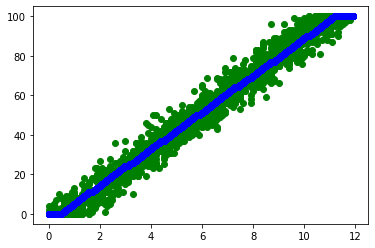

In [96]:
# 散点图：红色点表示测试集的点
plt.scatter(X_test , Y_test, color = 'green')
# 线图：蓝色线表示对测试集进行预测的结果
plt.scatter(X_test , score_predict, color ='blue')
plt.show()

In [98]:
your_time = input('请输入您的学习时间：')

请输入您的学习时间：7


In [99]:
your_time_arry = [[int(your_time)]]

In [100]:
your_score_predicted = int(regressor.predict(your_time_arry)[0][0]+0.5)

if your_score_predicted > 100:
    your_score_predicted = 100
elif your_score_predicted<0:
    your_score_predicted = 0
    
your_score_predicted

61

### 生成模拟数据

In [301]:
stu_amount  = 10000

In [302]:
time_sim = abs(np.random.rand(stu_amount)) * 12 
time_sim2 = [[(int(x*10))/10.] for x in time_sim]  
time_sim2

[[0.9],
 [2.6],
 [5.8],
 [2.0],
 [4.6],
 [9.9],
 [1.7],
 [4.1],
 [1.1],
 [8.1],
 [0.7],
 [9.3],
 [6.6],
 [0.5],
 [5.2],
 [10.4],
 [0.4],
 [6.6],
 [8.2],
 [1.5],
 [8.4],
 [11.0],
 [10.6],
 [2.3],
 [9.7],
 [9.5],
 [0.3],
 [9.1],
 [3.9],
 [3.9],
 [7.9],
 [4.4],
 [9.2],
 [7.4],
 [11.3],
 [8.5],
 [4.2],
 [5.6],
 [6.8],
 [4.1],
 [5.5],
 [1.3],
 [8.1],
 [3.6],
 [3.6],
 [3.2],
 [5.3],
 [2.1],
 [2.1],
 [4.2],
 [8.1],
 [9.3],
 [7.6],
 [1.1],
 [6.7],
 [7.5],
 [8.6],
 [3.9],
 [9.7],
 [2.4],
 [10.4],
 [11.5],
 [3.9],
 [1.0],
 [4.7],
 [4.9],
 [4.9],
 [10.4],
 [8.9],
 [4.8],
 [5.5],
 [1.5],
 [9.3],
 [7.0],
 [5.8],
 [7.2],
 [4.8],
 [8.0],
 [5.3],
 [1.8],
 [9.2],
 [4.0],
 [1.3],
 [8.3],
 [3.0],
 [6.3],
 [1.6],
 [11.1],
 [1.2],
 [9.6],
 [10.6],
 [10.2],
 [6.8],
 [4.0],
 [1.3],
 [2.8],
 [3.3],
 [8.9],
 [8.6],
 [0.2],
 [0.3],
 [3.1],
 [1.0],
 [4.3],
 [8.9],
 [4.3],
 [0.9],
 [10.6],
 [11.8],
 [5.1],
 [5.9],
 [2.1],
 [2.3],
 [1.4],
 [8.9],
 [3.8],
 [8.2],
 [8.0],
 [4.0],
 [4.2],
 [9.4],
 [8.2],
 [5.4],
 [3.

In [303]:
score_rand = 5 * np.random.randn(stu_amount)
score_rand2 =   [[x] for x in score_rand]
score_rand2

[[-4.670880443168654],
 [-3.468040194463679],
 [3.6184259951979465],
 [1.3704799251537874],
 [-2.4798841238037688],
 [-7.127264114286353],
 [4.5315702682502295],
 [4.036852888046409],
 [0.04555112933699454],
 [4.591659523197144],
 [0.9698238147747164],
 [-2.4392660989319888],
 [-5.131297070552344],
 [1.1910612521752564],
 [-4.910829524819329],
 [-0.8814023991019483],
 [-2.4451732098446803],
 [-14.063435209765407],
 [-1.2875844600995567],
 [7.619204657611992],
 [-0.7675075949558874],
 [-4.126026189112706],
 [-2.6940772041096297],
 [2.2401107141534964],
 [-0.5325474340234213],
 [-5.334095723573898],
 [1.9207002862390377],
 [14.788904071192974],
 [2.628640952590489],
 [2.256535517492471],
 [-0.2548236313511009],
 [-5.141833374610227],
 [-2.481065148918661],
 [5.068635735271965],
 [1.449061554066383],
 [-2.5886463836646363],
 [-1.575074358365677],
 [-3.818238625714348],
 [7.807459446112059],
 [-2.465291860291592],
 [-7.919068784588076],
 [5.324407401658007],
 [-5.4305251053822525],
 [1.928

In [304]:
score_sim  =  regressor.predict(time_sim2) + score_rand2
score_sim2 = []

for y in score_sim:
    if y>100:
        score_sim2.append(100)
    elif y<40:
        r = np.random.rand(1)
        if r >0.8:
            score_sim2.append(None)
        else:
            if y<0:
                score_sim2.append(0)
            else:
                score_sim2.append(int(y[0]+0.5))
    else:
        y_2 = int(y[0] +0.5) 
        score_sim2.append(y_2)
            
score_sim2

[None,
 15,
 53,
 14,
 35,
 82,
 14,
 37,
 4,
 76,
 1,
 81,
 52,
 0,
 39,
 93,
 None,
 43,
 71,
 15,
 74,
 96,
 93,
 18,
 87,
 80,
 0,
 96,
 34,
 None,
 70,
 31,
 80,
 70,
 100,
 73,
 None,
 44,
 67,
 31,
 39,
 11,
 66,
 30,
 None,
 27,
 36,
 9,
 7,
 33,
 67,
 75,
 65,
 1,
 66,
 62,
 77,
 None,
 83,
 18,
 92,
 100,
 37,
 0,
 36,
 47,
 39,
 97,
 95,
 40,
 41,
 5,
 85,
 58,
 48,
 66,
 None,
 65,
 44,
 8,
 77,
 33,
 11,
 82,
 25,
 57,
 16,
 100,
 None,
 88,
 100,
 87,
 66,
 35,
 4,
 13,
 28,
 74,
 81,
 None,
 None,
 None,
 4,
 34,
 82,
 None,
 0,
 88,
 100,
 36,
 52,
 14,
 None,
 None,
 81,
 40,
 72,
 63,
 33,
 30,
 88,
 72,
 32,
 26,
 17,
 92,
 7,
 100,
 100,
 69,
 64,
 11,
 100,
 70,
 61,
 37,
 98,
 0,
 13,
 58,
 67,
 0,
 50,
 25,
 100,
 100,
 100,
 None,
 90,
 93,
 96,
 1,
 10,
 3,
 46,
 30,
 52,
 19,
 15,
 44,
 None,
 91,
 52,
 92,
 3,
 26,
 23,
 26,
 0,
 97,
 95,
 100,
 10,
 7,
 54,
 54,
 2,
 5,
 30,
 76,
 97,
 60,
 80,
 None,
 28,
 18,
 74,
 45,
 34,
 100,
 35,
 29,
 0,
 0,
 22,
 67

In [305]:
stu_no = []
for i in range(stu_amount):
    stu_no_num = 20210100001 + i
    stu_no.append(str(stu_no_num))
    
stu_no

['20210100001',
 '20210100002',
 '20210100003',
 '20210100004',
 '20210100005',
 '20210100006',
 '20210100007',
 '20210100008',
 '20210100009',
 '20210100010',
 '20210100011',
 '20210100012',
 '20210100013',
 '20210100014',
 '20210100015',
 '20210100016',
 '20210100017',
 '20210100018',
 '20210100019',
 '20210100020',
 '20210100021',
 '20210100022',
 '20210100023',
 '20210100024',
 '20210100025',
 '20210100026',
 '20210100027',
 '20210100028',
 '20210100029',
 '20210100030',
 '20210100031',
 '20210100032',
 '20210100033',
 '20210100034',
 '20210100035',
 '20210100036',
 '20210100037',
 '20210100038',
 '20210100039',
 '20210100040',
 '20210100041',
 '20210100042',
 '20210100043',
 '20210100044',
 '20210100045',
 '20210100046',
 '20210100047',
 '20210100048',
 '20210100049',
 '20210100050',
 '20210100051',
 '20210100052',
 '20210100053',
 '20210100054',
 '20210100055',
 '20210100056',
 '20210100057',
 '20210100058',
 '20210100059',
 '20210100060',
 '20210100061',
 '20210100062',
 '202101

In [306]:
time_sim3 = [t[0] for t in time_sim2]
time_sim3

[0.9,
 2.6,
 5.8,
 2.0,
 4.6,
 9.9,
 1.7,
 4.1,
 1.1,
 8.1,
 0.7,
 9.3,
 6.6,
 0.5,
 5.2,
 10.4,
 0.4,
 6.6,
 8.2,
 1.5,
 8.4,
 11.0,
 10.6,
 2.3,
 9.7,
 9.5,
 0.3,
 9.1,
 3.9,
 3.9,
 7.9,
 4.4,
 9.2,
 7.4,
 11.3,
 8.5,
 4.2,
 5.6,
 6.8,
 4.1,
 5.5,
 1.3,
 8.1,
 3.6,
 3.6,
 3.2,
 5.3,
 2.1,
 2.1,
 4.2,
 8.1,
 9.3,
 7.6,
 1.1,
 6.7,
 7.5,
 8.6,
 3.9,
 9.7,
 2.4,
 10.4,
 11.5,
 3.9,
 1.0,
 4.7,
 4.9,
 4.9,
 10.4,
 8.9,
 4.8,
 5.5,
 1.5,
 9.3,
 7.0,
 5.8,
 7.2,
 4.8,
 8.0,
 5.3,
 1.8,
 9.2,
 4.0,
 1.3,
 8.3,
 3.0,
 6.3,
 1.6,
 11.1,
 1.2,
 9.6,
 10.6,
 10.2,
 6.8,
 4.0,
 1.3,
 2.8,
 3.3,
 8.9,
 8.6,
 0.2,
 0.3,
 3.1,
 1.0,
 4.3,
 8.9,
 4.3,
 0.9,
 10.6,
 11.8,
 5.1,
 5.9,
 2.1,
 2.3,
 1.4,
 8.9,
 3.8,
 8.2,
 8.0,
 4.0,
 4.2,
 9.4,
 8.2,
 5.4,
 3.5,
 2.9,
 8.9,
 1.8,
 11.6,
 11.8,
 7.9,
 6.9,
 1.8,
 11.7,
 8.1,
 6.9,
 4.5,
 10.3,
 0.2,
 1.5,
 7.0,
 7.8,
 0.7,
 5.9,
 3.2,
 11.8,
 10.8,
 11.1,
 0.1,
 9.6,
 10.9,
 10.2,
 1.8,
 1.2,
 1.0,
 5.9,
 3.7,
 5.9,
 2.7,
 1.3,
 4.0,
 1.3,
 10.3,
 5.2,


In [307]:
data = {'stu_no':stu_no, 'time': time_sim3, 'score':score_sim2}
data

{'stu_no': ['20210100001',
  '20210100002',
  '20210100003',
  '20210100004',
  '20210100005',
  '20210100006',
  '20210100007',
  '20210100008',
  '20210100009',
  '20210100010',
  '20210100011',
  '20210100012',
  '20210100013',
  '20210100014',
  '20210100015',
  '20210100016',
  '20210100017',
  '20210100018',
  '20210100019',
  '20210100020',
  '20210100021',
  '20210100022',
  '20210100023',
  '20210100024',
  '20210100025',
  '20210100026',
  '20210100027',
  '20210100028',
  '20210100029',
  '20210100030',
  '20210100031',
  '20210100032',
  '20210100033',
  '20210100034',
  '20210100035',
  '20210100036',
  '20210100037',
  '20210100038',
  '20210100039',
  '20210100040',
  '20210100041',
  '20210100042',
  '20210100043',
  '20210100044',
  '20210100045',
  '20210100046',
  '20210100047',
  '20210100048',
  '20210100049',
  '20210100050',
  '20210100051',
  '20210100052',
  '20210100053',
  '20210100054',
  '20210100055',
  '20210100056',
  '20210100057',
  '20210100058',
  '2

In [308]:
df = pd.DataFrame(data)

In [311]:
df

,stu_no,time,score
0,20210100001,0.9,NaN
1,20210100002,2.6,15.0
2,20210100003,5.8,53.0
3,20210100004,2.0,14.0
4,20210100005,4.6,35.0
...,...,...,...
9995,20210109996,1.2,5.0
9996,20210109997,7.2,65.0
9997,20210109998,7.7,78.0
9998,20210109999,6.9,59.0


In [312]:
df.to_csv('.\\score_sim.csv')